<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2018, семинар 7 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Linear models (Линейные модели)
<h3> Plan </h3>

* **Обзор линейных моделей (20 минут)** 

 - Линейная модель для классификации и регрессии
 - Функции потерь
 - Регуляризация для линейных моделей


* **Градиентный спуск (30 минут)**
 
 - Градиентные методы оптимизации
 - Нахождение градиента простых функций
 - Символьное дифференцирование


* **Методы стохастического градиента (30 минут)**
 - SGD, SAG
 - SGD with different loss function
 - SGD regularization

In [14]:
import os
import numpy as np
import seaborn as sns
import _pickle as pickle

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification


sns.set_context("notebook", font_scale=1.5)

from IPython.display import Image, SVG

from scipy import optimize
import matplotlib.pyplot as plt
# from IPython import display
import random

plt.style.use('ggplot')
%matplotlib inline

<h1 align="center">Warm Up: 3 datasets</h1> 

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
X += np.random.random(X.shape)

datasets = [make_moons(noise=0.1), make_circles(noise=0.1, factor=0.5), (X, y)]

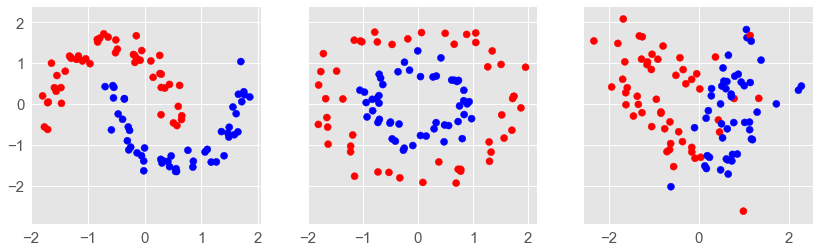

In [3]:
pylab.rcParams['figure.figsize'] = 14, 4
pl = plt.subplots(1, len(datasets), sharex='col', sharey='row')
for i, (X, y) in enumerate(datasets):
    X = StandardScaler().fit_transform(X)
    pl[1][i].scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))

** Вопрос **: Какая выборка линейно разделима (предполагает использование линейной модели классификации)?

** Вопросы **
 - 1) как выглядит решающее правило для линейных моделей? Какие параметры у линейных моделей?
 - 2) что общего между линейной моделью классификации и регрессии?
 - 3) может ли предсказание линейной модели выходить за область значений обучающей выборки?
 - 4) что такое реуляризация и зачем она нужна?

<h1 align="center"> Обзор линейных моделей </h1>

# Линейные модели для классификации и регрессии

### Классификация
### $$Y = \{+1, -1\},~X\in \mathbf{R}^d$$
### $$y_{predict}(x) = sign(<w, x>) $$ 
### $$margin(x, y) = y \cdot sign(<w, x>)$$
### $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$
### $L$ - функция потерь, $Q$ - функция эмпирического риска

### Регрессия
### $$Y = \mathbf{R},~X\in \mathbf{R}^d$$
### $$y_{predict}(x) = <w, x> $$ 
### $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

# Функции потерь:
    - Zero-one loss 
### $$L_i(x, y; w) = sign(1 - y\cdot<w, x>)$$
    - Hinge Loss 
### $$L_i(x, y; w) = max(0, 1 - y\cdot<w, x>)$$
    - Perceptron Loss 
### $$L_i(x, y; w) = max(0, -y\cdot<w, x>)$$
    - Logistic Loss 
### $$L_i(x, y; w) = log(1 + e^{-y\cdot<w, x>})$$
    - Squared hinge Loss
### $$L_i(x, y; w) = \bigl(max(0, 1 - y\cdot<w, x>)\bigr)^2$$
![](http://scikit-learn.org/0.15/_images/plot_sgd_loss_functions_001.png = 200x200)
<img src="http://scikit-learn.org/0.15/_images/plot_sgd_loss_functions_001.png", width=60% >

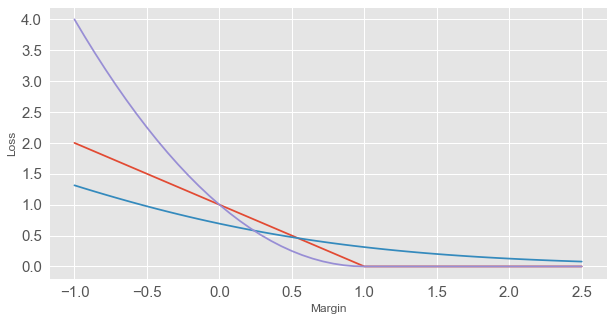

In [19]:
pylab.rcParams['figure.figsize'] = (10.0, 5.0) 
x = np.linspace(-1, 2.5)
pylab.plot(x, list(map(lambda m: np.max([0, 1 - m]), x)), label='hinge')
pylab.plot(x, list(map(lambda m: np.log(1 + e**(-m)), x)), label='logistic')
pylab.plot(x, list(map(lambda m: (np.max([0, 1 - m]))**2, x)), label='squared')
pylab.ylabel('Loss')
pylab.xlabel('Margin')

## Регуляризация

<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/09_linear_models/496/pic/Regularization.PNG" width=60%>

<a href="https://cs.stanford.edu/people/karpathy/svmjs/demo/">** Демо: Регуляризация делает решение более устойчивым **</a>

---------
<h1 align="center">Градиентный спуск</h1> 

** Вопросы **
* Что такое градиентный спуск (Gradient Descent)?
* Как обновляются веса в методе первого порядка?
* Какие недостатки у простого GD (метод первого порядка)?
* Какие вы знаете методы второго порядка?

<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2016/seminars/05_linear/img/conv.jpg" width=60%>

## Идея градиентных методов
<img src="http://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" width="30%">

## Обновление весов в методе первого порядка
## $$w_{k+1} = w_k - \nabla Q(w_k, X^\ell)= w_k - \nabla \sum_i L(w_k, x_i)$$

## Main Problems of gradient method
* Multicollinearity
* Scaling problem
* Plateau
* Zig-zagging

### Plateau
<img src="http://upload.wikimedia.org/wikipedia/commons/6/60/Banana-SteepDesc.gif" width="40%">

### Zig-zagging
<img src="http://upload.wikimedia.org/wikipedia/commons/7/79/Rosenbrock.png" width="40%">

## Методы второго порядка
### Нютон (HF, BFGS)
## $$w_{k+1} = w_k - \nabla^2 Q(x_k) \nabla Q(x_k)$$

Методы второго порядка -- намного быстрее, но как правило дорогие т.к. требуют хранения гессиана.
Некоторые методы второго порядка лишены этого недостатка. При необходимости можно использовать BFGS или HF Newton. 

# Нахождение градиента простых функций
## $$         \nabla_x \langle a, x \rangle = a.     $$
## $$         \nabla_x \|x\|_2^2 = 2 x.     $$
## $$         \nabla_x \langle Ax, x \rangle = (A + A^T) x, $$
### $where ~ A \in R^{d \times d}$
## $$         \nabla_x \|Ax + b\|_2^2 = 2 A^T (Ax + b).     $$

**Задача ** Найти производные приведенных функций по $w$, в матричной форме 
### $$Q(w) = \sum_i log(1-e^{-y_i <x_i, w>})$$

# Расчёт компонент для обновления весов

In [16]:
def sigmoid(x):
    return 2 * (1 + np.exp(x)) ** (-1)

def exponent(x):
    return np.exp(-x)

def deprivation(X_train, w, Y_train, func=sigmoid):
    return [func(sum(X_train[idx] * w) * Y_train[idx]) for idx in range(len(X_train))]

def empRisk(X_train, w, Y_train, func=sigmoid):#we want to minimize it
    return sum(deprivation(X_train, w, Y_train, func))

def gradOfSigmoid(x):
    return sigmoid(x) * (sigmoid(x) / 2 - 1)

def gradOfExponent(x):
    return -exponent(x)

def gradOfDeprivation(X_train, w, Y_train, func=gradOfSigmoid):
    return [func(sum(X_train[idx] * w) * Y_train[idx]) * Y_train[idx] * X_train[idx] for idx in range(len(X_train))]

def gradOfEmpRisk(X_train, w, Y_train, func=gradOfSigmoid):
    answ = sum(gradOfDeprivation(X_train, w, Y_train, func), axis=0).astype(np.double)
    return answ / len(X_train)

---------
<h1 align="center"> Метод стохастического градиента</h1> 

** Вопросы **
* Как 

In [10]:
iris = datasets.load_iris()
cv_strategy = ShuffleSplit(len(iris.target), n_iter=150, test_size=0.2, random_state=33)

In [11]:
estimators = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    SGDClassifier(),
    SGDClassifier(n_iter=20),
    SGDClassifier(n_iter=100),
    SGDClassifier(n_iter=1000),
    SGDClassifier(n_iter=5000),
    SGDClassifier(n_iter=10000),
    SGDClassifier(n_iter=100000),
]

for estimator in estimators:
    scoring = cross_val_score(estimator, iris.data, iris.target, scoring='accuracy', cv=cv_strategy)
    print '%.3lf' % scoring.mean(), '%.4lf' % scoring.std()

0.962 0.0287
0.949 0.0370
0.936 0.0446
0.707 0.1466
0.762 0.1402
0.807 0.1129
0.910 0.0751
0.958 0.0349
0.964 0.0303
0.964 0.0326


In [12]:
estimator = SGDClassifier(n_iter=10000).fit(iris.data, iris.target)
print estimator.coef_
print estimator.classes_

[[ -7.78148420e-01   2.29846922e-01  -1.42571714e+00  -6.96869218e-01]
 [  4.99667222e-01  -9.10060566e-01   5.99600666e-03  -1.41505757e+00]
 [ -1.91539102e+00  -4.79214177e+00   7.07129052e+00   1.35243261e+01]]
[0 1 2]


## EKG data

In [3]:
data = pd.read_csv('../data/EKG/train.csv')
data.head()

,id,label,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat207,feat208,feat209,feat210,feat211,feat212,feat213,feat214,feat215,feat216
0,1,1,7,0,3,0,2,3,0,6,...,3,4,2,2,0,13,0,11,1,3
1,2,1,0,11,0,0,10,1,0,0,...,0,2,0,0,2,8,1,13,0,4
2,3,0,9,0,3,0,1,3,0,4,...,48,11,2,0,0,4,0,2,0,0
3,4,0,0,9,3,2,25,0,4,0,...,1,14,1,0,0,0,3,0,17,1
4,5,0,0,0,0,0,2,5,0,0,...,3,12,0,3,0,4,0,24,4,0


In [14]:
X_train = np.asarray(data[range(1, data.shape[1])], dtype = double)
Y_train = np.asarray(data[[0]], dtype = double).ravel()

In [15]:
cv_strategy = ShuffleSplit(len(Y_train), n_iter=329, test_size=0.2, random_state=33)
for estimator in estimators:
    scoring = cross_val_score(estimator, X_train, Y_train, scoring='accuracy', cv=cv_strategy)
    print '%.3lf' % scoring.mean(), '%.4lf' % scoring.std()

0.887 0.0212
0.842 0.0227
0.831 0.0269
0.857 0.0323
0.864 0.0280
0.865 0.0234
0.861 0.0206
0.861 0.0204
0.861 0.0204
0.859 0.0203


## Gradient Method Analysis 

### Gradient Descent

In [17]:
w = [0]*(len(data.columns)-1)
empRisk(X_train, w, Y_train, func=sigmoid)

987.0

In [18]:
def gradientDescent(X_train, Y_train, w=None, func=sigmoid, gradOfFunc=gradOfSigmoid, p=lambda x : 0.001, N=9000, delta=sys.float_info.epsilon):
    cTime = time.time()
    cur = copy.copy(w)
    if w == None:
        if len(X_train) > 0:
            cur = np.array([0 for x in range(len(X_train[0]))], dtype=np.double)
        else:
            return -1

    for t in range(1, N + 1):
        gER = gradOfEmpRisk(X_train, cur, Y_train, gradOfFunc)
        prev = cur
        cur = cur - p(t) * gER
        #print empRisk(X_train, cur, Y_train, func), sum(abs(prev - cur))
        if sum(abs(prev - cur)) <= delta:
            if t == 1:
                print "Gradient Descent has converged in 1 step!"
            else:
                print "Gradient Descent has converged in", t, "steps!"
            print "for ", time.time() - cTime, " seconds."
            return cur
    print "Gradient Descent has worked", t, "steps!"
    print "for ", time.time() - cTime, " seconds."
    return cur


In [24]:
print "Func: Sigmoid"
newW = gradientDescent(X_train, Y_train, p=lambda x: 0.025, delta=5 * 1e-3)
empRisk(X_train, newW, Y_train)

Func: Sigmoid
Gradient Descent has converged in 2 steps!
for  0.0239999294281  seconds.


198.00039258062958

(array([ 43.,  47.,  30.,  18.,   8.,  11.,  11.,   4.,   6.,   5.,   7.,
          4.,   4.,   1.,   1.,   4.,   3.,   0.,   1.,   1.,   0.,   4.,
          1.,   1.,   1.]),
 array([ 0.00254559,  0.00783435,  0.0131231 ,  0.01841185,  0.02370061,
         0.02898936,  0.03427812,  0.03956687,  0.04485562,  0.05014438,
         0.05543313,  0.06072188,  0.06601064,  0.07129939,  0.07658815,
         0.0818769 ,  0.08716565,  0.09245441,  0.09774316,  0.10303192,
         0.10832067,  0.11360942,  0.11889818,  0.12418693,  0.12947568,
         0.13476444]),
 <a list of 25 Patch objects>)

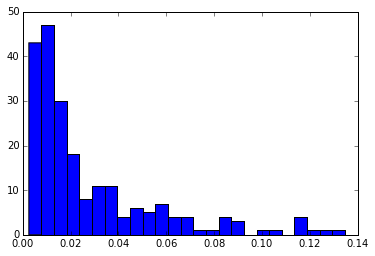

In [25]:
hist(newW, bins=25)

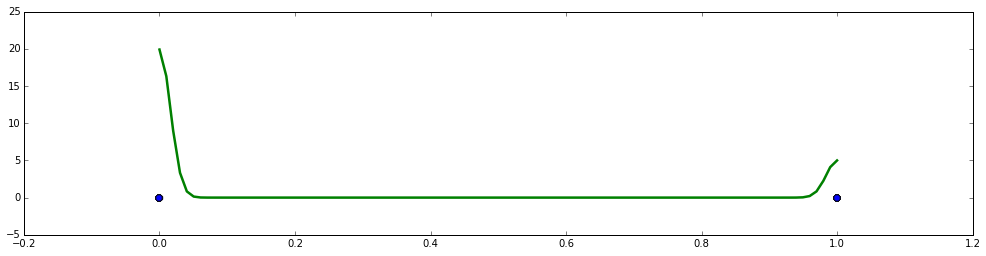

In [26]:
from scipy.stats import gaussian_kde
dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.04)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)

Func: Exponent
Gradient Descent has converged in 82 steps!
for  0.741000175476  seconds.


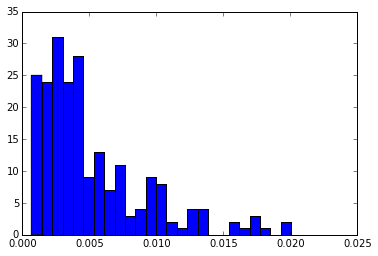

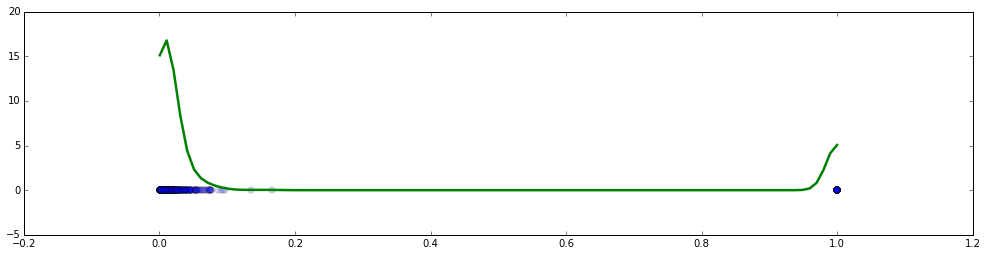

In [27]:
print "Func: Exponent"
newW = gradientDescent(X_train, Y_train, p=lambda x: 0.0009, func=exponent, gradOfFunc=gradOfExponent, delta=3 * 1e-3)
empRisk(X_train, newW, Y_train, func=exponent)


# In[11]:

hist(newW, bins=25)


# In[12]:

dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.04)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)

### Stochastic Gradient Descent

In [28]:
import random

def stochasticGradientDescent(X_train, Y_train, w=None, l=0.25, p=lambda x: 0.001, N=9000, funcRisk=empRisk, func=sigmoid, gradOfFunc=gradOfSigmoid, deltaQ=sys.float_info.epsilon, deltaW=sys.float_info.epsilon):
    cTime = time.time()
    newW = copy.copy(w)
    if w == None:
        if len(X_train) > 0:
            newW = np.array([0 for x in range(len(X_train[0]))], dtype=np.double)
        else:
            return -1

    q = funcRisk(X_train, newW, Y_train, func)
    tmpW = []
    tmpQ, t = 0, 0
    while not t or (sum(abs(tmpW - newW)) > deltaW and abs(q - tmpQ) > deltaQ and t < N):
        tmpQ = q
        tmpW = copy.copy(newW)
        idx = random.randint(0, len(X_train) - 1)
        e = deprivation(X_train, newW, Y_train, gradOfFunc)[idx]
        newW = newW - p(t + 1) * (gradOfDeprivation(X_train, newW, Y_train, gradOfFunc)[idx])
        q = (1 - l) * q + l * e
        t += 1
        #print empRisk(X_train, newW, Y_train, func), sum(abs(tmpW - newW))
        if sum(abs(tmpW - newW)) <= deltaW or abs(q - tmpQ) <= deltaQ:
            if t == 1:
                print "Stochastic Gradient Descent has converged in 1 step!"
            else:
                print "Stochastic Gradient Descent has converged in", t, "steps!"
            print "for ", time.time() - cTime, " seconds."
            return newW
    print "Stochastic Gradient Descent has worked", t, "steps!"
    print "for ", time.time() - cTime, " seconds."
    return newW

Func: Sigmoid
Stochastic Gradient Descent has converged in 3 steps!
for  0.0759999752045  seconds.


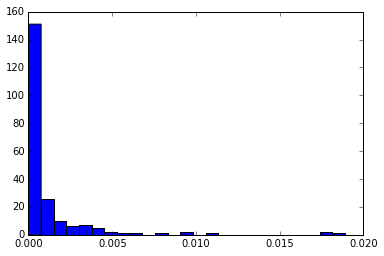

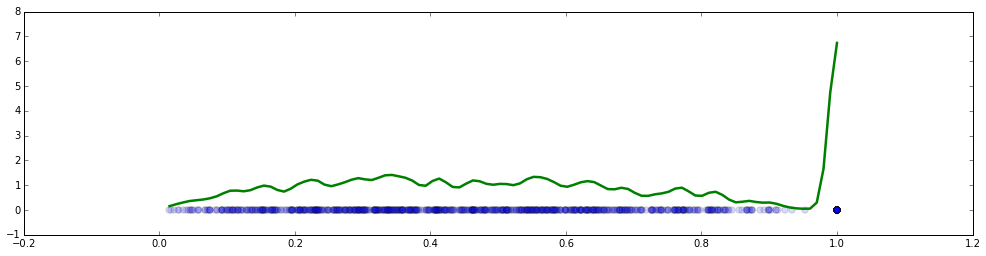

In [29]:
print "Func: Sigmoid"
newW = stochasticGradientDescent(X_train, Y_train, p = lambda x: 0.0006, deltaW=1e-6, deltaQ=1e-5)
empRisk(X_train, newW, Y_train)

hist(newW, bins=25)

dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.04)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)

Func: Exponent
Stochastic Gradient Descent has converged in 5 steps!
for  0.0789999961853  seconds.


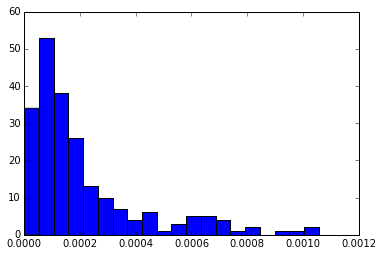

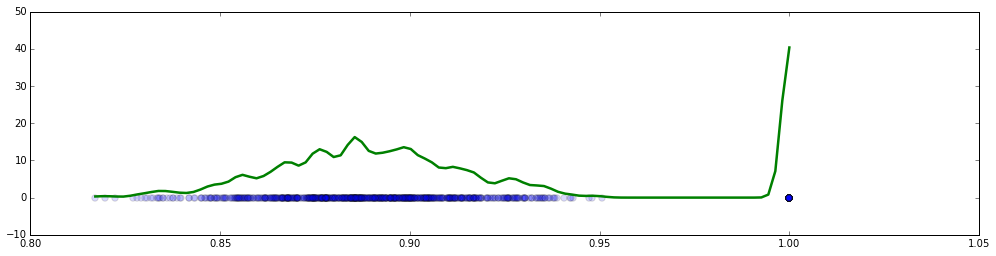

In [30]:
print "Func: Exponent"
newW = stochasticGradientDescent(X_train, Y_train, p=lambda x: 2 * 1e-5, func=exponent, gradOfFunc=gradOfExponent, deltaW=1e-5, deltaQ=1e-4)
empRisk(X_train, newW, Y_train, func=exponent)

hist(newW, bins=20)

dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.04)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)


### Steepest GD

## $$\eta_t = \arg\min\limits_{\eta>0} L \left(x_t - \eta \nabla L(x_t)\right)$$

In [34]:
def steepestGradientDescent(X, Y, w=None, func = sigmoid, gradOfFunc=gradOfSigmoid, N=8192, delta=sys.float_info.epsilon, internalDelta=sys.float_info.epsilon, internalN=1024, p=lambda x: 1, internalP=lambda x: 1):
    cTime = time.time()
    cur = copy.copy(w)
    if w == None:
        if len(X) > 0:
            cur = np.array([0 for x in range(len(X[0]))], dtype=np.double)
        else:
            return -1

    prev = inf
    for t in range(1, N + 1):
        par = p(t)
        gER = gradOfEmpRisk(X, cur, Y, gradOfFunc)
        check = sum(abs(prev - cur))
        if check > delta * 15:
            for x in range(1, internalN + 1):
                newest = cur - par * gER
                gradByPar = - double(np.matrix(gradOfEmpRisk(X, newest, Y, gradOfFunc)) * np.matrix(gER).T)
                #print empRisk(matrix, newest, Y_train, func=sigmoid)
                if sum(abs(gradByPar)) <= internalDelta:
                    break
                par = par - internalP(x) * gradByPar
         
        prev = cur
        cur = cur - par * gER
        #print "step: ", empRisk(matrix, cur, Y_train, func=sigmoid)
        if check <= delta:
            if t == 1:
                print "Steepest Gradient Descent has converged in 1 step!"
            else:
                print "Steepest Gradient Descent has converged in", t, "steps!"
            print "for ", time.time() - cTime, " seconds."
            return cur
    print "Steepest Gradient Descent has worked", t, "steps!"
    print "for ", time.time() - cTime, " seconds."
    return cur

Func: Sigmoid
Steepest Gradient Descent has converged in 3 steps!
for  0.0620000362396  seconds.


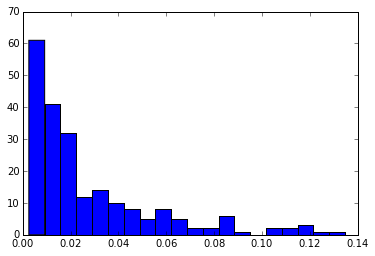

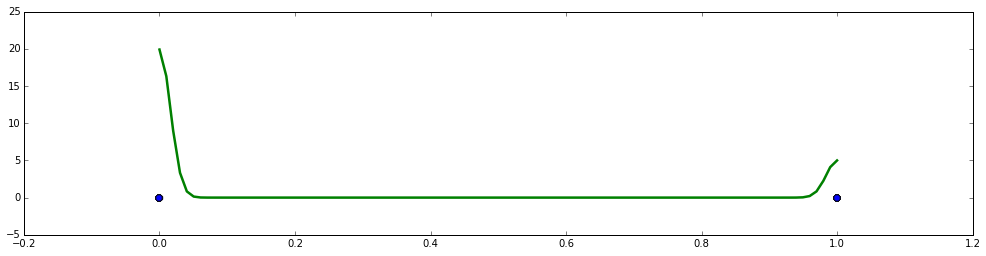

In [36]:
print "Func: Sigmoid"
newW = steepestGradientDescent(X_train, Y_train, p=lambda x: 0.025, internalP=lambda x: 0.02, internalN=2, internalDelta=0.01, delta=1e-2)
empRisk(X_train, newW, Y_train, func=sigmoid)

hist(newW, bins=20)

dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.04)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)

Func: Exponent
Steepest Gradient Descent has converged in 82 steps!
for  0.708999872208  seconds.


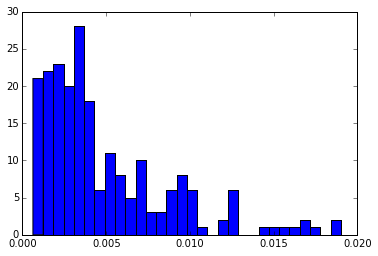

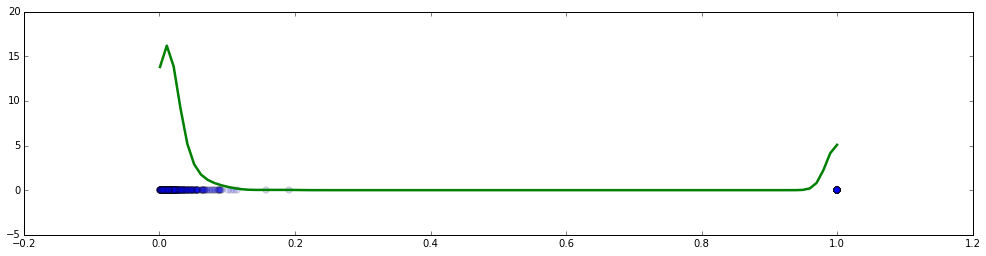

In [39]:
print "Func: Exponent"
newW = steepestGradientDescent(X_train, Y_train, p=lambda x: 7 * 1e-4, internalP=lambda x: 7 * 1e-8, internalN=1, func=exponent, gradOfFunc=gradOfExponent, delta = 3 * 1e-3)
empRisk(X_train, newW, Y_train, func=exponent)


# In[25]:

hist(newW, bins=30)


# In[26]:

dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.04)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)

### Newton approach

In [40]:
def doubleGradOfSigmoid(x):
    return sigmoid(x) * (sigmoid(x) - 1) * (sigmoid(x) / 2 - 1)

def doubleGradOfEmpRisk(X, w, Y, func=doubleGradOfSigmoid):
    return np.matrix(sum([func(sum(X[idx] * w) * Y[idx]) * np.matrix(X[idx]).T * np.matrix(X[idx]) for idx in range(len(X))], axis=0))

def gradOfQuadr(x):#quadr = (1 - x)^2 * I{x < 1}
    if x > 1:
        return 0
    else:
        return -2 * (1 - x)

def doubleGradOfQuadr(x):
    if x > 1:
        return 0
    else:
        return 2

def newtonMethod(X, Y, w=None, gradOfFunc=gradOfQuadr, doubleGradOfFunc=doubleGradOfQuadr, N=1024, delta=sys.float_info.min, p=lambda x: 1):
    newW = copy.copy(w)
    if w == None:
        if len(X) > 0:
            newW = np.array([0 for x in range(len(X_train[0]))], dtype=np.double)
        else:
            return -1
    for t in range(1, N):
        tmpW = copy.copy(newW)
        inversed = doubleGradOfEmpRisk(X = X, w=newW, Y=Y, func=doubleGradOfFunc).I
        transposed  = np.matrix(gradOfEmpRisk(X, newW, Y, gradOfSigmoid)).T
        newW = newW - p(t) * inversed * transposed #so, we can't use sigmoida
        #newW = newW - (doubleGradOfEmpRisk(X_train, newW, Y_train, func=doubleGradOfFunc).I) * np.matrix(gradOfEmpRisk(X_train, newW, Y_train, gradOfFunc)).T
        print empRisk(X, newW, Y)
        if sum(abs(tmpW - newW)) <= delta:
            if t == 1:
                print "Gradient Descent has converged in 1 step!"
            else:
                print "Gradient Descent has converged in", t, "steps!"
            return newW
    return newW

Func: Sigmoid
198.000199005
990.0
990.0
Gradient Descent has converged in 3 steps!


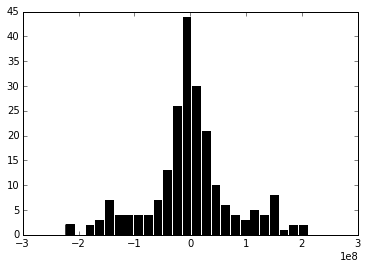

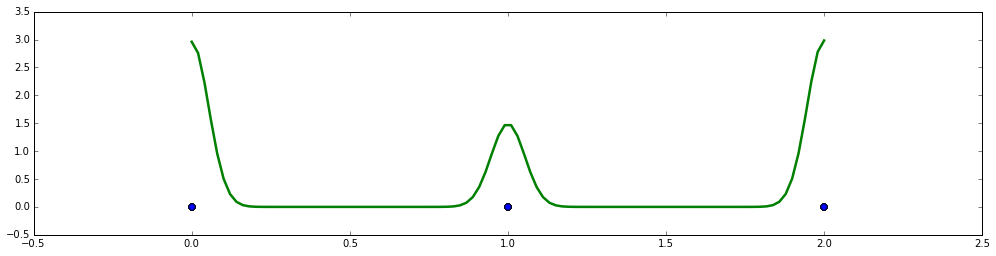

In [41]:
print "Func: Sigmoid"
newW = newtonMethod(X = X_train, Y= Y_train, N=64, p=lambda x: 7.375 * 1e+2)
empRisk(X_train, newW, Y_train)
hist(newW, bins=25)

dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.06)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)


Func: Sigmoid
198.0
198.0
Gradient Descent has converged in 2 steps!


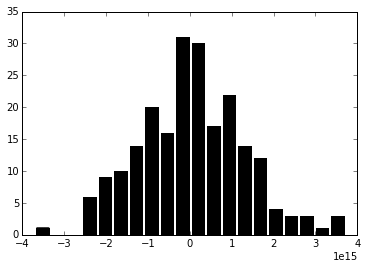

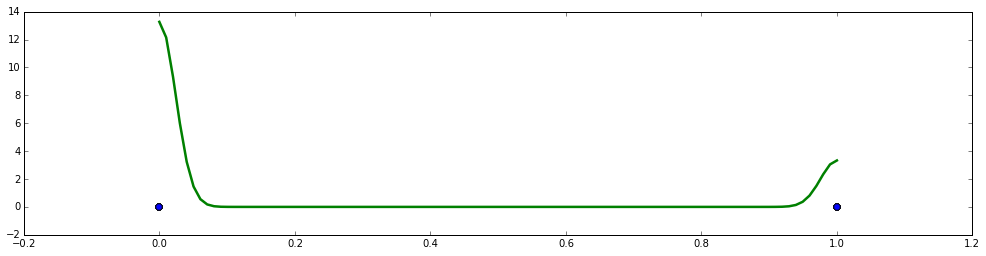

In [42]:
print "Func: Sigmoid"
newW = newtonMethod(X_train, Y_train, N=16, p=lambda x: 1e+20)
empRisk(X_train, newW, Y_train, func=exponent)


# In[32]:

hist(newW, bins=20)


# In[33]:

dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.06)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)


Func: Exponent
198.0
198.0
Gradient Descent has converged in 2 steps!


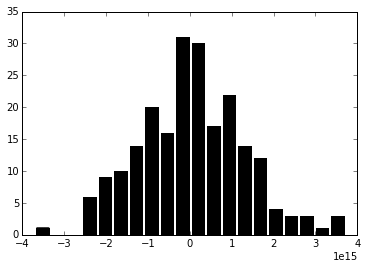

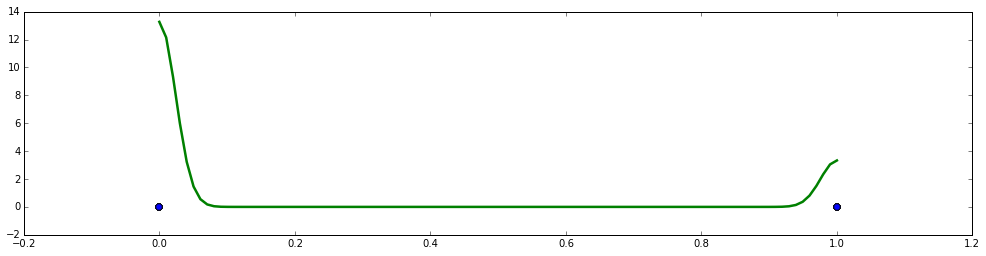

In [43]:
print "Func: Exponent"
newW = newtonMethod(X_train, Y_train, N=16, p=lambda x: 1e+20)
empRisk(X_train, newW, Y_train, func=exponent)

hist(newW, bins=20)

dp = deprivation(X_train, newW, Y_train)
figure(figsize=(17, 4))

xs = linspace(min(dp), max(dp), 100)

density = gaussian_kde(dp, bw_method=0.06)
plot(xs, density(xs), linewidth=2.5, color='green')
scatter(dp, zeros(len(dp)), s=40, alpha=0.15)

###Выводы

####Сравнение функций штрафа:
#####При сигмоидной быстрая сходимость, надо лишь подобрать начальные данные и размер подходящего шага. 
#####С экспонентой сходимость медленнее, чем с сигмоидным функционалом. Экспоненту нельзя использовать, когда есть выбросы - слишком большой штраф за них. Как правило, градиент громадный, поэтому величину шага надо подбирать очень маленьким. Экспоненциальную функцию выгоднее использовать на данных где почти нет выбросов, которые мы стараемся убрать из ошибки.

#### Сравнение методов поиска оптимума
##### GD сходится довольно быстро (количество итераций), но ресурсозатратен (процессорное время). Важно правильно подобрать величину шага (возможно, на каждой итерации своя).
##### SGD менее ресурсозатратен GD (т.к. не считает всю производную и пересчитывает функционал налету - online). Для быстрой сходимости важно правильно подбирать величину шага. Использовать на данных из 216+ признаков не выгодно, слишком большая вероятность, что шагнёт не в нужную сторону (собственно, это видно по распределению ошибок).
##### Steepest SGD: сходится быстрее, чем SGD, но брать наилучший шаг по градиенту выгодно лишь на первых шагах алгоритма, пока сам градиент большой. Далее, из-за большой размерности оптимизация шага по градиенту лишь тратит время, поэтому логичнее спускаться обычным градиентом (с постоянным шагом). 
##### Newton: сходится быстрее, чем остальные, но ресурсвоемкий. НО если шаг сделать очень большим, можно прыгнуть в локальный минимум.

 


### Stochastic GD, Momentum, Nesterov

Что делать если в функции большая сумма? Давайте считать градиент только по случайной подвыборке

## $$w_{k+1} = w_k -  \nabla \hat{f}(w_k)$$

## $$w_{k+1} = w_k - E \nabla \hat{f}(x_k)$$

## $$x_{k+1} =w_k - E \nabla \hat{f}(x_k-\alpha E \nabla \hat{f}_{k-1})$$

## Достоинства и недостатки SGD
* Benefits:
     - Suitable for online learning
     - Learning on big and small sets
     - Faster than classic GD

* Disadvantages and recommendations
    - Convergence problems!
    - Multiextremal functional and local extremums
        -- recommendation: jog of weights
    - Not very fast
           - recommendation: SAG version of SGD
$$w^{(t+1)}=w^{(t)}-\frac{\eta_t}{\ell} \nabla \left( (\ell-1)\cdot Q(w^{(t-1)},X^\ell\setminus \{x_i\}) + Q(w^{(t)},x_i)\right)$$
    - Sensitivity to feature scales
           - recommendation: scale features
    - Over-fitting and instability
           - recommendation: regularization 
$$Q_\tau(w) = Q(w)+\frac{\tau}{2}\lVert w\rVert^2$$

<h1 align="center">Заключение</h1>  

**SGD**: 
*Достоинства:
    - Быстрые
    - Работают
    - Интерпретируемы
    - Применимы к большим данным
    - Можно обучать онлайн
* Недостатки:
    - Плохая обобщающая способность
    - Вопросы сходимости

** Обратная связь ** 
  * оцените <a href="https://goo.gl/forms/kYZuyAQLuwo8szce2"> семинар </a>
  * оставьте <a href="https://goo.gl/forms/zeZiu1fSgrpPGp6T2"> отзыв </a> о лекции